In [1]:
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
read_train = pd.read_csv('UnScaled Data_train.csv')
read_test = pd.read_csv('UnScaled Data_test.csv')

In [3]:
read_train.head()

,Unnamed: 0,year,location_type,cellphone_access,household_size,age_of_respondent,marital_status,education_level,job_type,country_Kenya,...,country_Tanzania,country_Uganda,gender_of_respondent_Female,gender_of_respondent_Male,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse
0,0,2,0,1,2,8,2,3,9,1,...,0,0,1,0,0,0,0,0,0,1
1,1,2,0,0,4,54,4,0,4,1,...,0,0,1,0,0,1,0,0,0,0
2,2,2,1,1,4,10,3,5,9,1,...,0,0,0,1,0,0,0,1,0,0
3,3,2,0,1,4,18,2,2,3,1,...,0,0,1,0,0,1,0,0,0,0
4,4,2,1,0,7,10,3,2,5,1,...,0,0,0,1,1,0,0,0,0,0


In [4]:
read_train = read_train.drop('Unnamed: 0', axis = 1)

In [5]:
read_train.shape

(23524, 20)

In [6]:
read_test = read_test.drop('Unnamed: 0', axis = 1)
read_test.shape

(10086, 20)

In [23]:
target = pd.read_csv('train_target.csv')
target = target.drop('0', axis = 1)
update_target= [1]

for k in target['1']:
    update_target.append(k)
targ = np.array(update_target)
targ.shape

(23524,)

In [24]:
from sklearn.model_selection import train_test_split
target = target.astype('int')
x_train, x_test,y_train, y_test = train_test_split(read_train, targ, train_size = 0.8, random_state = 42)


In [8]:
#build keras model

from keras import models, Sequential, layers

In [150]:
model = models.Sequential()
model.add(layers.Dense(100, activation = 'relu', input_shape = (20,)))
model.add(layers.Dense(1000, activation = 'relu'))
model.add(layers.Dense(1000, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 100)               2100      
_________________________________________________________________
dense_72 (Dense)             (None, 1000)              101000    
_________________________________________________________________
dense_73 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_74 (Dense)             (None, 100)               100100    
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 101       
Total params: 1,204,301
Trainable params: 1,204,301
Non-trainable params: 0
_________________________________________________________________


In [123]:
#model prediction on test_data

In [124]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics = ['acc'])

#ada grad
#ada_grad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

history = model.fit(x_train, y_train, epochs = 30, batch_size = 1000, 
                   validation_data = (x_test, y_test))


Train on 18819 samples, validate on 4705 samples
Epoch 1/30
18819/18819 [==============================] - 3s 143us/step - loss: 0.4172 - acc: 0.8581 - val_loss: 0.3972 - val_acc: 0.8646
Epoch 2/30
18819/18819 [==============================] - 2s 95us/step - loss: 0.3923 - acc: 0.8611 - val_loss: 0.3772 - val_acc: 0.8648
Epoch 3/30
18819/18819 [==============================] - 2s 97us/step - loss: 0.4029 - acc: 0.8592 - val_loss: 0.3557 - val_acc: 0.8687
Epoch 4/30
18819/18819 [==============================] - 2s 96us/step - loss: 0.3601 - acc: 0.8669 - val_loss: 0.3434 - val_acc: 0.8755
Epoch 5/30
18819/18819 [==============================] - 2s 99us/step - loss: 0.3584 - acc: 0.8676 - val_loss: 0.3372 - val_acc: 0.8774
Epoch 6/30
18819/18819 [==============================] - 2s 97us/step - loss: 0.3467 - acc: 0.8701 - val_loss: 0.3296 - val_acc: 0.8769
Epoch 7/30
18819/18819 [==============================] - 2s 102us/step - loss: 0.3477 - acc: 0.8701 - val_loss: 0.3260 - val_ac

In [127]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
#ada grad
ada_grad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

#ada_delta
#ada_delta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

model.compile(loss = 'binary_crossentropy', optimizer = ada_grad, metrics = ['acc'])


history = model.fit(x_train, y_train, epochs = 30, batch_size = 1000, 
                   validation_data = (x_test, y_test))

Train on 18819 samples, validate on 4705 samples
Epoch 1/30
18819/18819 [==============================] - 3s 147us/step - loss: 2.1981 - acc: 0.8411 - val_loss: 2.1993 - val_acc: 0.8635
Epoch 2/30
18819/18819 [==============================] - 2s 95us/step - loss: 2.2868 - acc: 0.8581 - val_loss: 2.1993 - val_acc: 0.8635
Epoch 3/30
18819/18819 [==============================] - 2s 95us/step - loss: 2.2868 - acc: 0.8581 - val_loss: 2.1993 - val_acc: 0.8635
Epoch 4/30
18819/18819 [==============================] - 2s 97us/step - loss: 2.2868 - acc: 0.8581 - val_loss: 2.1993 - val_acc: 0.8635
Epoch 5/30
18819/18819 [==============================] - 2s 97us/step - loss: 2.2868 - acc: 0.8581 - val_loss: 2.1993 - val_acc: 0.8635
Epoch 6/30
18819/18819 [==============================] - 2s 96us/step - loss: 2.2868 - acc: 0.8581 - val_loss: 2.1993 - val_acc: 0.8635
Epoch 7/30
18819/18819 [==============================] - 2s 97us/step - loss: 2.2868 - acc: 0.8581 - val_loss: 2.1993 - val_acc

In [129]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
#ada grad
#ada_grad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

#ada_delta
ada_delta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

model.compile(loss = 'binary_crossentropy', optimizer = ada_delta, metrics = ['acc'])


history = model.fit(x_train, y_train, epochs = 30, batch_size = 1000, 
                   validation_data = (x_test, y_test))

Train on 18819 samples, validate on 4705 samples
Epoch 1/30
18819/18819 [==============================] - 3s 165us/step - loss: 0.5041 - acc: 0.8329 - val_loss: 0.3846 - val_acc: 0.8635
Epoch 2/30
18819/18819 [==============================] - 2s 105us/step - loss: 0.4090 - acc: 0.8581 - val_loss: 0.4000 - val_acc: 0.8635
Epoch 3/30
18819/18819 [==============================] - 2s 107us/step - loss: 0.3947 - acc: 0.8587 - val_loss: 0.3795 - val_acc: 0.8635
Epoch 4/30
18819/18819 [==============================] - 2s 108us/step - loss: 0.3867 - acc: 0.8593 - val_loss: 0.3690 - val_acc: 0.8638
Epoch 5/30
18819/18819 [==============================] - 2s 109us/step - loss: 0.3762 - acc: 0.8629 - val_loss: 0.4080 - val_acc: 0.8638
Epoch 6/30
18819/18819 [==============================] - 2s 112us/step - loss: 0.3712 - acc: 0.8634 - val_loss: 0.3736 - val_acc: 0.8663
Epoch 7/30
18819/18819 [==============================] - 2s 112us/step - loss: 0.3635 - acc: 0.8664 - val_loss: 0.3372 - v

In [151]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
#ada grad
#ada_grad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

#ada_delta
#ada_delta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

#Adam
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['acc'])


history = model.fit(x_train, y_train, epochs = 30, batch_size = 1000, 
                   validation_data = (x_test, y_test))

Train on 18819 samples, validate on 4705 samples
Epoch 1/30
18819/18819 [==============================] - 3s 185us/step - loss: 0.4841 - acc: 0.8274 - val_loss: 0.3748 - val_acc: 0.8635
Epoch 2/30
18819/18819 [==============================] - 2s 97us/step - loss: 0.3634 - acc: 0.8623 - val_loss: 0.3450 - val_acc: 0.8718
Epoch 3/30
18819/18819 [==============================] - 2s 97us/step - loss: 0.3448 - acc: 0.8667 - val_loss: 0.3405 - val_acc: 0.8682
Epoch 4/30
18819/18819 [==============================] - 2s 100us/step - loss: 0.3303 - acc: 0.8713 - val_loss: 0.3161 - val_acc: 0.8778
Epoch 5/30
18819/18819 [==============================] - 2s 103us/step - loss: 0.3213 - acc: 0.8739 - val_loss: 0.3103 - val_acc: 0.8797
Epoch 6/30
18819/18819 [==============================] - 2s 108us/step - loss: 0.3134 - acc: 0.8766 - val_loss: 0.3013 - val_acc: 0.8827
Epoch 7/30
18819/18819 [==============================] - 2s 106us/step - loss: 0.3123 - acc: 0.8773 - val_loss: 0.3013 - val

In [139]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
#ada grad
#ada_grad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

#ada_delta
#ada_delta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

#Adam
#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


#ada_max
ada_max = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

model.compile(loss = 'binary_crossentropy', optimizer = ada_max, metrics = ['acc'])


history = model.fit(x_train, y_train, epochs = 30, batch_size = 1000, 
                   validation_data = (x_test, y_test))

Train on 18819 samples, validate on 4705 samples
Epoch 1/30
18819/18819 [==============================] - 3s 162us/step - loss: 0.4928 - acc: 0.8528 - val_loss: 0.3769 - val_acc: 0.8635
Epoch 2/30
18819/18819 [==============================] - 2s 99us/step - loss: 0.3688 - acc: 0.8596 - val_loss: 0.3427 - val_acc: 0.8706
Epoch 3/30
18819/18819 [==============================] - 2s 108us/step - loss: 0.3457 - acc: 0.8670 - val_loss: 0.3304 - val_acc: 0.8733
Epoch 4/30
18819/18819 [==============================] - 2s 102us/step - loss: 0.3362 - acc: 0.8707 - val_loss: 0.3195 - val_acc: 0.8780
Epoch 5/30
18819/18819 [==============================] - 2s 105us/step - loss: 0.3267 - acc: 0.8735 - val_loss: 0.3167 - val_acc: 0.8784
Epoch 6/30
18819/18819 [==============================] - 2s 105us/step - loss: 0.3210 - acc: 0.8742 - val_loss: 0.3084 - val_acc: 0.8801
Epoch 7/30
18819/18819 [==============================] - 2s 109us/step - loss: 0.3136 - acc: 0.8766 - val_loss: 0.3040 - va

In [144]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='mean_squared_error', optimizer=sgd)
#model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])
#ada grad
#ada_grad = keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

#ada_delta
#ada_delta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

#Adam
#adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


#ada_max
#ada_max = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)

#nadam
nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

model.compile(loss = 'binary_crossentropy', optimizer = nadam, metrics = ['acc'])


history = model.fit(x_train, y_train, epochs = 30, batch_size = 1000, 
                   validation_data = (x_test, y_test))

Train on 18819 samples, validate on 4705 samples
Epoch 1/30
18819/18819 [==============================] - 3s 180us/step - loss: 0.5479 - acc: 0.8198 - val_loss: 0.3898 - val_acc: 0.8635
Epoch 2/30
18819/18819 [==============================] - 2s 107us/step - loss: 0.3885 - acc: 0.8596 - val_loss: 0.3466 - val_acc: 0.8693
Epoch 3/30
18819/18819 [==============================] - 2s 103us/step - loss: 0.3685 - acc: 0.8650 - val_loss: 0.3513 - val_acc: 0.8725
Epoch 4/30
18819/18819 [==============================] - 2s 106us/step - loss: 0.3479 - acc: 0.8682 - val_loss: 0.3284 - val_acc: 0.8710
Epoch 5/30
18819/18819 [==============================] - 2s 105us/step - loss: 0.3515 - acc: 0.8670 - val_loss: 0.3341 - val_acc: 0.8710
Epoch 6/30
18819/18819 [==============================] - 2s 104us/step - loss: 0.3326 - acc: 0.8728 - val_loss: 0.3271 - val_acc: 0.8616
Epoch 7/30
18819/18819 [==============================] - 2s 108us/step - loss: 0.3239 - acc: 0.8723 - val_loss: 0.3057 - v

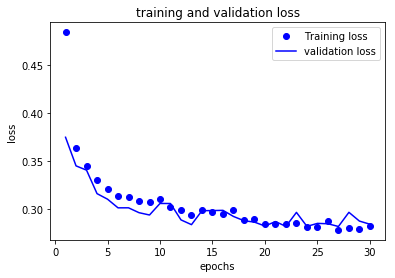

In [152]:
# plotting the training and validation loss

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 31)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

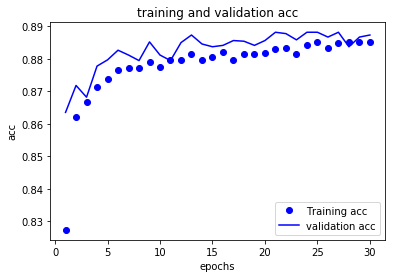

In [153]:
# plotting the training and validation acc

history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

epochs = range(1, 31)
plt.plot(epochs, loss_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_loss_values, 'b', label = 'validation acc')
plt.title('training and validation acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [154]:
model.evaluate(x_test, y_test), model.evaluate(x_train, y_train)

18819/18819 [==============================] - 2s 125us/step


([0.28423121379615141, 0.88735387885228478],
 [0.2772710949389966, 0.88724161751738162])

In [155]:
prediction = model.predict(read_test)
set_val = 0

def approximate(val):
    if val <= 0.5:
        set_val = 0
    else:
        set_val = 1
    return set_val
data = pd.DataFrame(prediction)
approximate_data = data[0].apply(approximate)
approximate_data[:10]

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: 0, dtype: int64

In [156]:
unique_id = pd.read_csv('test_unique_id.csv')
unique_id = unique_id.drop('Unnamed: 0', axis = 1)
unique_id.head()

,uniqueid
0,uniqueid_6056 x Kenya
1,uniqueid_6060 x Kenya
2,uniqueid_6065 x Kenya
3,uniqueid_6072 x Kenya
4,uniqueid_6073 x Kenya


In [157]:
unique_id['bank_account'] = approximate_data
unique_id.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,0
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [158]:
gbrt_data = pd.read_csv('gbrt.csv')
#gbrt_data = gbrt_data.drop('Unnamed: 0', axis = 1)
gbrt_data.head()

,uniqueid,bank_account
0,uniqueid_6056 x Kenya,1
1,uniqueid_6060 x Kenya,1
2,uniqueid_6065 x Kenya,0
3,uniqueid_6072 x Kenya,0
4,uniqueid_6073 x Kenya,0


In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(gbrt_data['bank_account'], unique_id['bank_account'])

0.94140392623438429

In [160]:
unique_id.to_csv('keras_one.csv', index = False)